# Week3 HW: Group Assignment2: Census Data exploration

##  Los Angeles County Commute Data
Hello, this is Shinah. As Andrey mentioned in the previous notebook, we are comparing the transit infrastructure of LA to Seoul. This notebook is generated for Project Assignment2. Project Assignment 2 is designed to explore census data that is relevant to our team's final project. In this notebook particularly, we will figure out the distribution of people that are working in Los Angeles County and what modes they chose to commute by using 'Means of Transportation to work' data. The data is downloaded from [censusreporter](https://censusreporter.org/).

First, I need to import libraries that I will use throughout the analysis. 

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Next thing to do is import the census data. I uploaded my data to the 'data'file inside Week3.

In [2]:
LA_com = gpd.read_file('data/acs2019_5yr_B08006_14000US06037534001.geojson')

I want to see how many columns and rows are in this data.

In [3]:
LA_com.shape

(2347, 105)

I want to check how the data looks like by looking at the first 5 rows.

In [4]:
LA_com.head()

,geoid,name,B08006001,"B08006001, Error",B08006002,"B08006002, Error",B08006003,"B08006003, Error",B08006004,"B08006004, Error",...,"B08006047, Error",B08006048,"B08006048, Error",B08006049,"B08006049, Error",B08006050,"B08006050, Error",B08006051,"B08006051, Error",geometry
0,05000US06037,"Los Angeles County, CA",4811408.0,9061.0,4016706.0,10739.0,3560471.0,10203.0,456235.0,6351.0,...,197.0,8085.0,698.0,65092.0,1756.0,33633.0,1477.0,137565.0,3063.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,253.0,1860.0,265.0,1656.0,270.0,204.0,80.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,49.0,32.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,175.0,1730.0,178.0,1617.0,186.0,113.0,91.0,...,12.0,0.0,12.0,0.0,12.0,8.0,12.0,56.0,39.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,438.0,2699.0,411.0,2430.0,356.0,269.0,197.0,...,17.0,0.0,17.0,31.0,49.0,87.0,67.0,74.0,74.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,202.0,1439.0,200.0,1323.0,201.0,116.0,67.0,...,12.0,0.0,12.0,8.0,13.0,15.0,21.0,63.0,52.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


There are 105 column and I want to see the entire header. So here, I will override the defaults.

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Let's check the table again.

In [6]:
LA_com.sample()

,geoid,name,B08006001,"B08006001, Error",B08006002,"B08006002, Error",B08006003,"B08006003, Error",B08006004,"B08006004, Error",B08006005,"B08006005, Error",B08006006,"B08006006, Error",B08006007,"B08006007, Error",B08006008,"B08006008, Error",B08006009,"B08006009, Error",B08006010,"B08006010, Error",B08006011,"B08006011, Error",B08006012,"B08006012, Error",B08006013,"B08006013, Error",B08006014,"B08006014, Error",B08006015,"B08006015, Error",B08006016,"B08006016, Error",B08006017,"B08006017, Error",B08006018,"B08006018, Error",B08006019,"B08006019, Error",B08006020,"B08006020, Error",B08006021,"B08006021, Error",B08006022,"B08006022, Error",B08006023,"B08006023, Error",B08006024,"B08006024, Error",B08006025,"B08006025, Error",B08006026,"B08006026, Error",B08006027,"B08006027, Error",B08006028,"B08006028, Error",B08006029,"B08006029, Error",B08006030,"B08006030, Error",B08006031,"B08006031, Error",B08006032,"B08006032, Error",B08006033,"B08006033, Error",B08006034,"B08006034, Error",B08006035,"B08006035, Error",B08006036,"B08006036, Error",B08006037,"B08006037, Error",B08006038,"B08006038, Error",B08006039,"B08006039, Error",B08006040,"B08006040, Error",B08006041,"B08006041, Error",B08006042,"B08006042, Error",B08006043,"B08006043, Error",B08006044,"B08006044, Error",B08006045,"B08006045, Error",B08006046,"B08006046, Error",B08006047,"B08006047, Error",B08006048,"B08006048, Error",B08006049,"B08006049, Error",B08006050,"B08006050, Error",B08006051,"B08006051, Error",geometry
705,14000US06037226420,"Census Tract 2264.20, Los Angeles, CA",2631.0,405.0,1659.0,338.0,1169.0,252.0,490.0,192.0,450.0,184.0,40.0,45.0,0.0,17.0,496.0,176.0,476.0,169.0,20.0,32.0,0.0,17.0,0.0,17.0,0.0,17.0,119.0,100.0,237.0,169.0,97.0,79.0,23.0,39.0,1693.0,308.0,1133.0,244.0,864.0,210.0,269.0,139.0,246.0,134.0,23.0,35.0,0.0,17.0,215.0,95.0,215.0,95.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,119.0,100.0,115.0,69.0,97.0,79.0,14.0,31.0,938.0,189.0,526.0,147.0,305.0,106.0,221.0,100.0,204.0,98.0,17.0,27.0,0.0,17.0,281.0,125.0,261.0,116.0,20.0,32.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,122.0,123.0,0.0,17.0,9.0,23.0,"MULTIPOLYGON (((-118.26130 34.02158, -118.2607..."


Now I can see the entire table. Now I want to plot the census tracts.

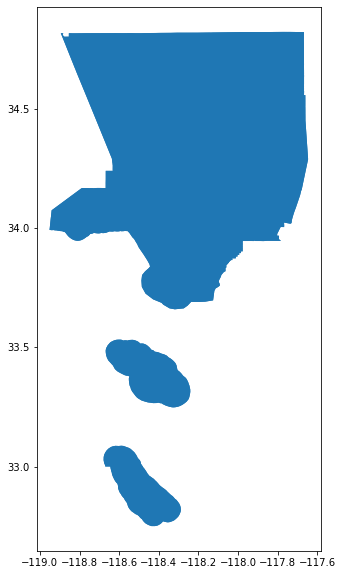

In [7]:
LA_com.plot(figsize=(10,10))

I want to check the basic information of the data.

In [8]:
LA_com.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Columns: 105 entries, geoid to geometry
dtypes: float64(102), geometry(1), object(2)
memory usage: 1.9+ MB


The first row of the data, which shows the total number of commute in LA county, should be dropped in order to prevent the skew.

In [9]:
LA_com = LA_com.drop([0])

Checking the refined geodataframe named LA_com here..

In [10]:
LA_com.head()

,geoid,name,B08006001,"B08006001, Error",B08006002,"B08006002, Error",B08006003,"B08006003, Error",B08006004,"B08006004, Error",B08006005,"B08006005, Error",B08006006,"B08006006, Error",B08006007,"B08006007, Error",B08006008,"B08006008, Error",B08006009,"B08006009, Error",B08006010,"B08006010, Error",B08006011,"B08006011, Error",B08006012,"B08006012, Error",B08006013,"B08006013, Error",B08006014,"B08006014, Error",B08006015,"B08006015, Error",B08006016,"B08006016, Error",B08006017,"B08006017, Error",B08006018,"B08006018, Error",B08006019,"B08006019, Error",B08006020,"B08006020, Error",B08006021,"B08006021, Error",B08006022,"B08006022, Error",B08006023,"B08006023, Error",B08006024,"B08006024, Error",B08006025,"B08006025, Error",B08006026,"B08006026, Error",B08006027,"B08006027, Error",B08006028,"B08006028, Error",B08006029,"B08006029, Error",B08006030,"B08006030, Error",B08006031,"B08006031, Error",B08006032,"B08006032, Error",B08006033,"B08006033, Error",B08006034,"B08006034, Error",B08006035,"B08006035, Error",B08006036,"B08006036, Error",B08006037,"B08006037, Error",B08006038,"B08006038, Error",B08006039,"B08006039, Error",B08006040,"B08006040, Error",B08006041,"B08006041, Error",B08006042,"B08006042, Error",B08006043,"B08006043, Error",B08006044,"B08006044, Error",B08006045,"B08006045, Error",B08006046,"B08006046, Error",B08006047,"B08006047, Error",B08006048,"B08006048, Error",B08006049,"B08006049, Error",B08006050,"B08006050, Error",B08006051,"B08006051, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,253.0,1860.0,265.0,1656.0,270.0,204.0,80.0,151.0,68.0,53.0,46.0,0.0,12.0,59.0,48.0,36.0,43.0,23.0,25.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,26.0,36.0,82.0,52.0,1072.0,202.0,986.0,209.0,927.0,208.0,59.0,42.0,59.0,42.0,0.0,12.0,0.0,12.0,27.0,35.0,17.0,30.0,10.0,17.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,26.0,36.0,33.0,48.0,955.0,135.0,874.0,138.0,729.0,136.0,145.0,66.0,92.0,46.0,53.0,46.0,0.0,12.0,32.0,27.0,19.0,22.0,13.0,18.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,49.0,32.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,175.0,1730.0,178.0,1617.0,186.0,113.0,91.0,57.0,49.0,35.0,59.0,21.0,41.0,9.0,15.0,0.0,12.0,9.0,15.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,10.0,16.0,8.0,12.0,77.0,46.0,1008.0,163.0,968.0,166.0,903.0,164.0,65.0,66.0,27.0,41.0,22.0,37.0,16.0,31.0,9.0,15.0,0.0,12.0,9.0,15.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,10.0,16.0,0.0,12.0,21.0,25.0,826.0,127.0,762.0,116.0,714.0,115.0,48.0,40.0,30.0,30.0,13.0,21.0,5.0,10.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,8.0,12.0,56.0,39.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,438.0,2699.0,411.0,2430.0,356.0,269.0,197.0,239.0,192.0,20.0,32.0,10.0,19.0,68.0,61.0,68.0,61.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,74.0,65.0,87.0,67.0,129.0,95.0,1685.0,272.0,1562.0,264.0,1382.0,239.0,180.0,186.0,170.0,183.0,0.0,17.0,10.0,19.0,25.0,38.0,25.0,38.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,43.0,40.0,0.0,17.0,55.0,54.0,1372.0,253.0,1137.0,251.0,1048.0,249.0,89.0,64.0,69.0,56.0,20.0,32.0,0.0,17.0,43.0,48.0,43.0,48.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,31.0,49.0,87.0,67.0,74.0,74.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,202.0,1439.0,200.0,1323.0,201.0,116.0,67.0,110.0,67.0,6.0,10.0,0.0,12.0,48.0,45.0,48.0,45.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,8.0,13.0,30.0,42.0,68.0,52.0,761.0,120.0,702.0,125.0,650.0,127.0,52.0,37.0,46.0,35.0,6.0,10.0,0.0,12.0,39.0,44.0,39.0,44.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,15.0,21.0,5.0,9.0,832.0,134.0,737.0,129.0,673.0,136.0,64.0,47.0,64.0,47.0,0.0,12.0,0.0,12.0,9.0,14.0,9.0,14.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,8.0,13.0,15.0,21.0,63.0,52.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.28

These are the list of columns..

In [11]:
list(LA_com)

['geoid',
 'name',
 'B08006001',
 'B08006001, Error',
 'B08006002',
 'B08006002, Error',
 'B08006003',
 'B08006003, Error',
 'B08006004',
 'B08006004, Error',
 'B08006005',
 'B08006005, Error',
 'B08006006',
 'B08006006, Error',
 'B08006007',
 'B08006007, Error',
 'B08006008',
 'B08006008, Error',
 'B08006009',
 'B08006009, Error',
 'B08006010',
 'B08006010, Error',
 'B08006011',
 'B08006011, Error',
 'B08006012',
 'B08006012, Error',
 'B08006013',
 'B08006013, Error',
 'B08006014',
 'B08006014, Error',
 'B08006015',
 'B08006015, Error',
 'B08006016',
 'B08006016, Error',
 'B08006017',
 'B08006017, Error',
 'B08006018',
 'B08006018, Error',
 'B08006019',
 'B08006019, Error',
 'B08006020',
 'B08006020, Error',
 'B08006021',
 'B08006021, Error',
 'B08006022',
 'B08006022, Error',
 'B08006023',
 'B08006023, Error',
 'B08006024',
 'B08006024, Error',
 'B08006025',
 'B08006025, Error',
 'B08006026',
 'B08006026, Error',
 'B08006027',
 'B08006027, Error',
 'B08006028',
 'B08006028, Error',
 

I checked the metadata and selected some columns that I want to keep.   
•'geoid':geoid of the census track    
•'name':name of the census track   
•'B08006001' : Total   
•'B08006002' : Car, truck, or van   
•'B08006008' : Public transportation (excluding taxicab)   
•'B08006014' : Bicycle   
•'B08006015' : Walked   
•'B08006016' : Taxicab, motorcycle, or other means   
•'B08006017' : Worked from home   
•'geometry' : long lat coordinates   

In [12]:
columns_to_keep = ['geoid',
 'name',
 'B08006001',
 'B08006002',
 'B08006008',
 'B08006014',
 'B08006015',
 'B08006016',
 'B08006017',
 'geometry']

Here, I refine LA_com to have only the columns that I want to see.

In [13]:
LA_com = LA_com[columns_to_keep]

Checking again to see how it looks..

In [14]:
LA_com.head()

,geoid,name,B08006001,B08006002,B08006008,B08006014,B08006015,B08006016,B08006017,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,59.0,0.0,0.0,26.0,82.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,9.0,0.0,10.0,8.0,77.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,2699.0,68.0,0.0,74.0,87.0,129.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,1439.0,48.0,0.0,8.0,30.0,68.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,1538.0,26.0,0.0,0.0,0.0,218.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


It worked well! But I still want to rename columns. First, I will create a list of column names.

In [15]:
list(LA_com)

['geoid',
 'name',
 'B08006001',
 'B08006002',
 'B08006008',
 'B08006014',
 'B08006015',
 'B08006016',
 'B08006017',
 'geometry']

I will copy and paste the list above and replace values with the desired column names.

In [16]:
LA_com.columns = ['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Public transportation (excluding taxicab)',
 'Bicycle',
 'Walked',
 'Taxicab, motorcycle, or other means',
 'Worked from home',
'geometry']

Let's see if the operation is successful. 

In [17]:
LA_com.head()

,geoid,name,Total,"Car, truck, or van",Public transportation (excluding taxicab),Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,59.0,0.0,0.0,26.0,82.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,9.0,0.0,10.0,8.0,77.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,2699.0,68.0,0.0,74.0,87.0,129.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,1439.0,48.0,0.0,8.0,30.0,68.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,1538.0,26.0,0.0,0.0,0.0,218.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


I will check if the 'Total' equal the rest of the other columns. I will pick a random row..

In [18]:
random_tract = LA_com.sample()
random_tract

,geoid,name,Total,"Car, truck, or van",Public transportation (excluding taxicab),Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry
1030,14000US06037302505,"Census Tract 3025.05, Los Angeles, CA",1628.0,1327.0,138.0,61.0,28.0,23.0,51.0,"MULTIPOLYGON (((-118.25740 34.12175, -118.2571..."


I will use the iloc command which gives me the value based on the position of the row and column.

In [19]:
random_tract.iloc[0]['Total']

1628.0

In [20]:
print(random_tract.iloc[0]['Car, truck, or van'] + 
      random_tract.iloc[0]['Public transportation (excluding taxicab)'] + 
      random_tract.iloc[0]['Bicycle'] + 
      random_tract.iloc[0]['Walked'] + 
      random_tract.iloc[0]['Taxicab, motorcycle, or other means'] + 
      random_tract.iloc[0]['Worked from home'])

1628.0


Great! The values executed by the two cells above are same.   
Now, let's move on to plot graphs and maps.

I want to check the total number of workers in LA county and related stats.

In [21]:
LA_com['Total'].describe()

count    2346.000000
mean     2050.898551
std       803.753324
min         0.000000
25%      1523.000000
50%      1989.000000
75%      2534.250000
max      6829.000000
Name: Total, dtype: float64

According to the describe, each county has 2050 workers that commute in average.   

Now I plot the histogram that shows the distribution of workers by census tracks.

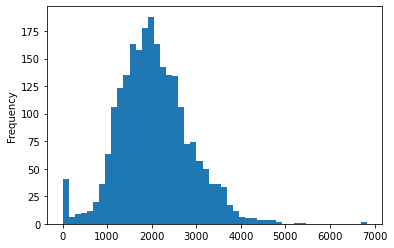

In [22]:
LA_com['Total'].plot.hist(bins=50)

This looks similar with the histogram of population because the more people live in a census track, it is likely that the more workers commute from the region.   

To see the top 10 workers census tracts, I will sort the data by their columns.

In [23]:
LA_com_sorted = LA_com.sort_values(by='Total',ascending = False)

Checking how the sorted gdf looks..

In [24]:
LA_com_sorted[['geoid','Total']].head(10)

,geoid,Total
923,14000US06037275602,6829.0
2147,14000US06037702901,6727.0
2107,14000US06037700200,5343.0
2198,14000US06037901004,5322.0
994,14000US06037300600,4822.0
1930,14000US06037577000,4787.0
2236,14000US06037910705,4694.0
2048,14000US06037621104,4667.0
2275,14000US06037920037,4654.0
85,14000US06037111400,4584.0


I will plot the top 100 census tracks based on the number of workers.

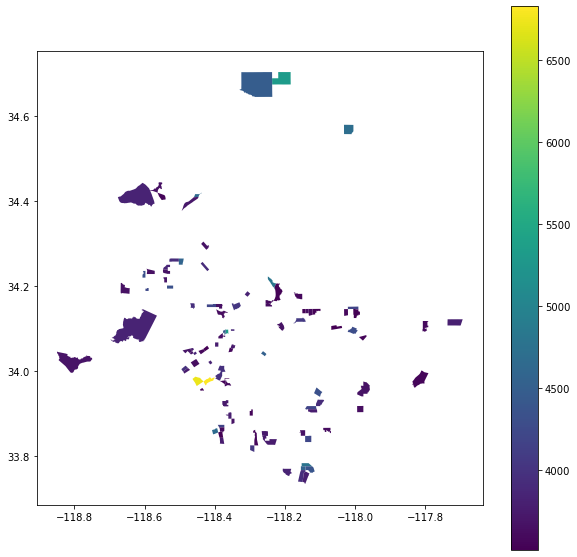

In [25]:
LA_com_sorted.head(100).plot(figsize=(10,10),column='Total',legend=True)

**There are some census tracks that commuting by car is prevalent. And there are other census tracks that commuting by public transportation is easier than other regions. To see where those regions are, I should draw a map based on the mode share.**   

Thus, I need to normalize the data and see the percent of each tranportation mode people use to commute.

I will create new columns and calculate the normalized data to get the percent of modes in each census track.

In [26]:
LA_com['Percent Car, truck, or van'] = LA_com['Car, truck, or van']/LA_com['Total']*100
LA_com['Percent Public transportation (excluding taxicab)'] = LA_com['Public transportation (excluding taxicab)']/LA_com['Total']*100
LA_com['Percent Bicycle'] = LA_com['Bicycle']/LA_com['Total']*100
LA_com['Percent Walked'] = LA_com['Walked']/LA_com['Total']*100
LA_com['Percent Taxicab, motorcycle, or other means'] = LA_com['Taxicab, motorcycle, or other means']/LA_com['Total']*100
LA_com['Percent Worked from home'] = LA_com['Worked from home']/LA_com['Total']*100

checking sample..

In [27]:
LA_com.sample(5)

,geoid,name,Total,"Car, truck, or van",Public transportation (excluding taxicab),Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry,"Percent Car, truck, or van",Percent Public transportation (excluding taxicab),Percent Bicycle,Percent Walked,"Percent Taxicab, motorcycle, or other means",Percent Worked from home
1741,14000US06037551202,"Census Tract 5512.02, Los Angeles, CA",3343.0,3048.0,67.0,0.0,54.0,0.0,174.0,"MULTIPOLYGON (((-118.14652 33.92177, -118.1458...",91.175591,2.004188,0.000000,1.615316,0.000000,5.204906
745,14000US06037232700,"Census Tract 2327, Los Angeles, CA",2730.0,2207.0,295.0,0.0,87.0,50.0,91.0,"MULTIPOLYGON (((-118.29150 33.99526, -118.2871...",80.842491,10.805861,0.000000,3.186813,1.831502,3.333333
640,14000US06037216402,"Census Tract 2164.02, Los Angeles, CA",1535.0,1312.0,49.0,0.0,36.0,30.0,108.0,"MULTIPOLYGON (((-118.38358 34.06093, -118.3835...",85.472313,3.192182,0.000000,2.345277,1.954397,7.035831
1348,14000US06037460600,"Census Tract 4606, Los Angeles, CA",1976.0,1663.0,6.0,10.0,7.0,34.0,256.0,"MULTIPOLYGON (((-118.23137 34.21898, -118.2308...",84.159919,0.303644,0.506073,0.354251,1.720648,12.955466
969,14000US06037296210,"Census Tract 2962.10, Los Angeles, CA",1169.0,1033.0,95.0,0.0,21.0,0.0,20.0,"MULTIPOLYGON (((-118.28787 33.74510, -118.2878...",88.366125,8.126604,0.000000,1.796407,0.000000,1.710864


Not surprisingly, calculations show that in most of the census tracks, 'Percent Car, truck, or van' is very high and the percentage of rest of the modes are pretty low.

I suddenly wanted to check the mean of the percent of each mode.. so I picked two columns to figure out the mean and used describe command.

In [28]:
LA_com['Percent Car, truck, or van'].describe()

count    2322.000000
mean       83.025847
std        11.175785
min         0.000000
25%        79.306499
50%        85.715950
75%        90.246734
max       100.000000
Name: Percent Car, truck, or van, dtype: float64

In [29]:
LA_com['Percent Public transportation (excluding taxicab)'].describe()

count    2322.000000
mean        6.145910
std         7.324507
min         0.000000
25%         1.821929
50%         3.870545
75%         7.777968
max       100.000000
Name: Percent Public transportation (excluding taxicab), dtype: float64

Above shows that the average percent for car is 83% and the average for public transportation is 6%.

Now I'm ready to draw maps!

I want a map that shows the regions that use car the most as commuting mode.

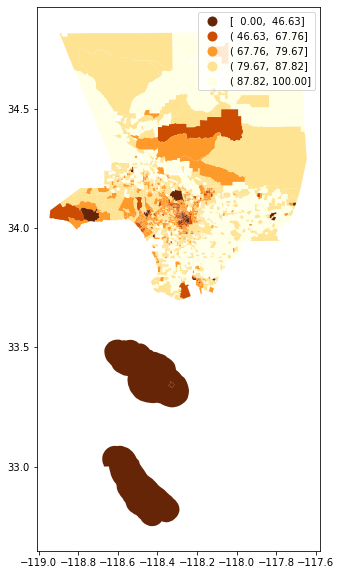

In [30]:
LA_com.plot(figsize=(12,10),
                 column='Percent Car, truck, or van',
                 legend=True, 
                 scheme='NaturalBreaks',
                 cmap='YlOrBr_r')

I want to draw multiple maps to compare the place where most workers are commuting from and the place where most public transit users are distributed.

Text(0.5, 1.0, 'Percent Public transportation (excluding taxicab)')

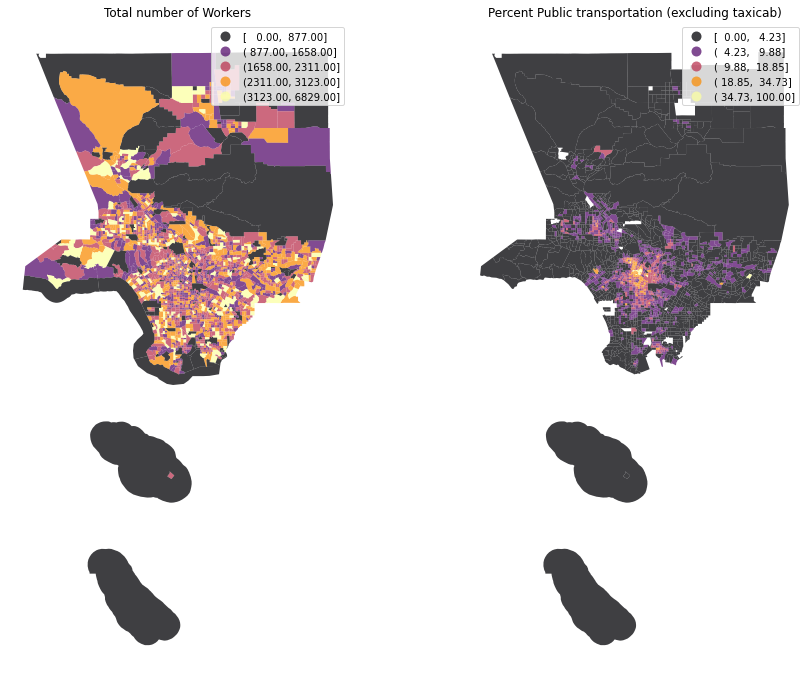

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

LA_com.plot(column='Total', 
            cmap='inferno', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")  
ax1.set_title("Total number of Workers")

LA_com.plot(column='Percent Public transportation (excluding taxicab)', 
            cmap='inferno', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Public transportation (excluding taxicab)")

I seems like there are some areas that have workers a lot but transit system is not supported well.

Lastly, I want to draw the map on the real map to understand the location easily.   
Since our data is angular, so I need a convertion to mercator.

In [32]:
LA_com_web_mercator = LA_com.to_crs(epsg=3857)

checking if it worked..

In [33]:
LA_com_web_mercator.head()

,geoid,name,Total,"Car, truck, or van",Public transportation (excluding taxicab),Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry,"Percent Car, truck, or van",Percent Public transportation (excluding taxicab),Percent Bicycle,Percent Walked,"Percent Taxicab, motorcycle, or other means",Percent Worked from home
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,59.0,0.0,0.0,26.0,82.0,"MULTIPOLYGON (((-13169350.794 4063591.834, -13...",91.761223,2.910705,0.0,0.000000,1.282684,4.045387
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,9.0,0.0,10.0,8.0,77.0,"MULTIPOLYGON (((-13169467.902 4065613.937, -13...",94.329335,0.490731,0.0,0.545256,0.436205,4.198473
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,2699.0,68.0,0.0,74.0,87.0,129.0,"MULTIPOLYGON (((-13169034.646 4063225.625, -13...",88.289172,2.224403,0.0,2.420674,2.845927,4.219823
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,1439.0,48.0,0.0,8.0,30.0,68.0,"MULTIPOLYGON (((-13167528.939 4062726.771, -13...",90.332706,3.013183,0.0,0.502197,1.883239,4.268675
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,1538.0,26.0,0.0,0.0,0.0,218.0,"MULTIPOLYGON (((-13166671.668 4062511.964, -13...",86.307520,1.459035,0.0,0.000000,0.000000,12.233446


Cool! This is the last map of this notebook. I want to show the places where people chose car, van, and truck as their commuting mode predominantly.

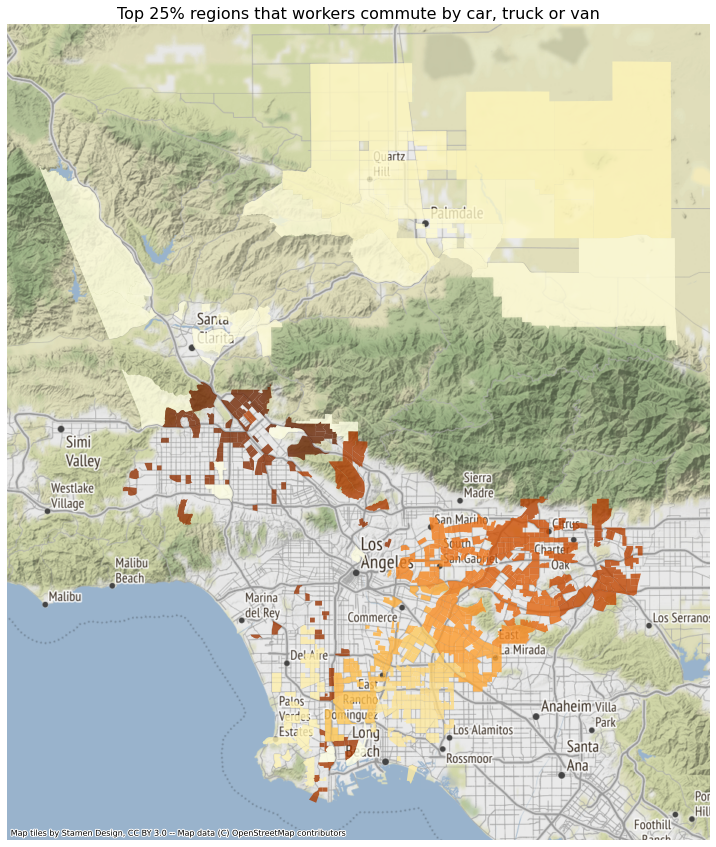

In [34]:
fig, ax = plt.subplots(figsize=(15, 15))

LA_com_web_mercator[LA_com_web_mercator['Percent Car, truck, or van'] > 90].plot(ax=ax, alpha=0.8, cmap='YlOrBr_r', scheme='NaturalBreaks')
#90 is the 75th percentile of Percent Car, truck, or van

ax.axis('off')
ax.set_title('Top 25% regions that workers commute by car, truck or van',fontsize=16)

ctx.add_basemap(ax)

Looking at this map, we can guess that workers living East and South of LA lack access to transit system and tends to rely more on cars to commute.